2
torch.Size([100, 150, 400])
tensor([[ 65,  49,  75,  ...,  53,  48,  62],
        [ 59,  63,  83,  ...,  46,  50,  64],
        [ 60,  57,  92,  ...,  45,  58,  65],
        ...,
        [126, 118, 142,  ..., 205, 189, 174],
        [108, 120, 122,  ..., 181, 184, 167],
        [109, 104, 106,  ..., 174, 190, 181]], dtype=torch.uint8)
tensor([3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3,
        3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 4, 3, 3, 4,
        3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4,
        4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 4, 3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 4,
        3, 3, 4, 4])


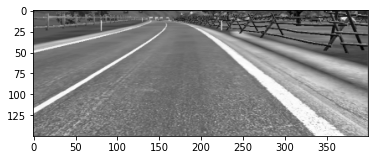

In [1]:
import matplotlib.pyplot as plt

from data import load_data
et = load_data('../EuroTruck_v6_highway_test.npy')
# print(eudata)
print(len(et))
dict_data = next(iter(et))
image = dict_data['image']
label = dict_data['label']
print(image.shape)
print(image[0])
# test_img = image[0]
# test_img = test_img[299:599, :]
# print(test_img.shape)
print(label)
plt.imshow(image[0], cmap='gray')

In [2]:
import torch
from model import EuroTruckModel

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = EuroTruckModel(n_speed_classes=2, n_turn_classes=2).to(device)
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-2)
criterion = torch.nn.CrossEntropyLoss()
# optimizer = optim.SGD()
def train(epoch=2):
    running_loss = 0.0
    for batch_idx, data in enumerate(et, 0):
        img = data['image']
        img = torch.unsqueeze(img, 1)
        img = img.float() / 255.0
        print(img[0])
        target = data['label']
        img, speed_target = img.to(device), target.to(device)
        optimizer.zero_grad()

#       # forward + backward + update
        output = model(img)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % 1 == 0 :
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss / 2000))
            running_loss = 0.0


train()

tensor([[[0.6980, 0.6980, 0.6980,  ..., 0.8078, 0.5647, 0.4941],
         [0.6980, 0.6980, 0.7020,  ..., 0.8118, 0.5647, 0.4941],
         [0.6980, 0.6980, 0.7020,  ..., 0.8118, 0.5686, 0.4941],
         ...,
         [0.1529, 0.1529, 0.1569,  ..., 0.1843, 0.3020, 0.5843],
         [0.1569, 0.1569, 0.1529,  ..., 0.1843, 0.3020, 0.5843],
         [0.1490, 0.1569, 0.1529,  ..., 0.1765, 0.3020, 0.5843]]])
[#1]
torch.Size([100, 1, 600, 800])
[#2]
torch.Size([100, 10, 298, 398])
torch.Size([100, 20, 147, 197])
[3,     1] loss: 0.001
tensor([[[0.6784, 0.6824, 0.6784,  ..., 0.8078, 0.5647, 0.4941],
         [0.6824, 0.6863, 0.6824,  ..., 0.8118, 0.5647, 0.4941],
         [0.6824, 0.6863, 0.6863,  ..., 0.8157, 0.5686, 0.4941],
         ...,
         [0.1490, 0.1490, 0.1529,  ..., 0.1451, 0.2824, 0.5843],
         [0.1529, 0.1569, 0.1686,  ..., 0.1529, 0.2863, 0.5843],
         [0.1529, 0.1529, 0.1765,  ..., 0.1647, 0.2941, 0.5843]]])
[#1]
torch.Size([100, 1, 600, 800])
[#2]
torch.Size([100, 10

In [4]:
print(model)


EuroTruckModel(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=579180, out_features=9, bias=True)
)
